In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv('datasets/train.csv')
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test_df = pd.read_csv('datasets/test.csv')
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
# convert 'datetime' column to datetime object
# train_df['datetime'] = pd.to_datetime(train_df['datetime'])
# test_df['datetime'] = pd.to_datetime(test_df['datetime'])

In [6]:
def get_dt(dt_str):
    return datetime.strptime(dt_str, '%Y-%m-%d %H:%M:%S')

def add_features(df):
    df['hour'] = df.datetime.apply(lambda x: get_dt(x).hour)
    df['year'] = df.datetime.apply(lambda x: get_dt(x).year)
    df['weekday'] = df.datetime.apply(lambda x: get_dt(x).weekday())
    df['month'] = df.datetime.apply(lambda x: get_dt(x).month)
    df = df.drop(columns=['datetime'])
    return df

In [7]:
train_df = add_features(train_df)
test_df = add_features(test_df)

In [8]:
train_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,weekday,month
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011,5,1
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011,5,1
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011,5,1
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011,5,1


[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

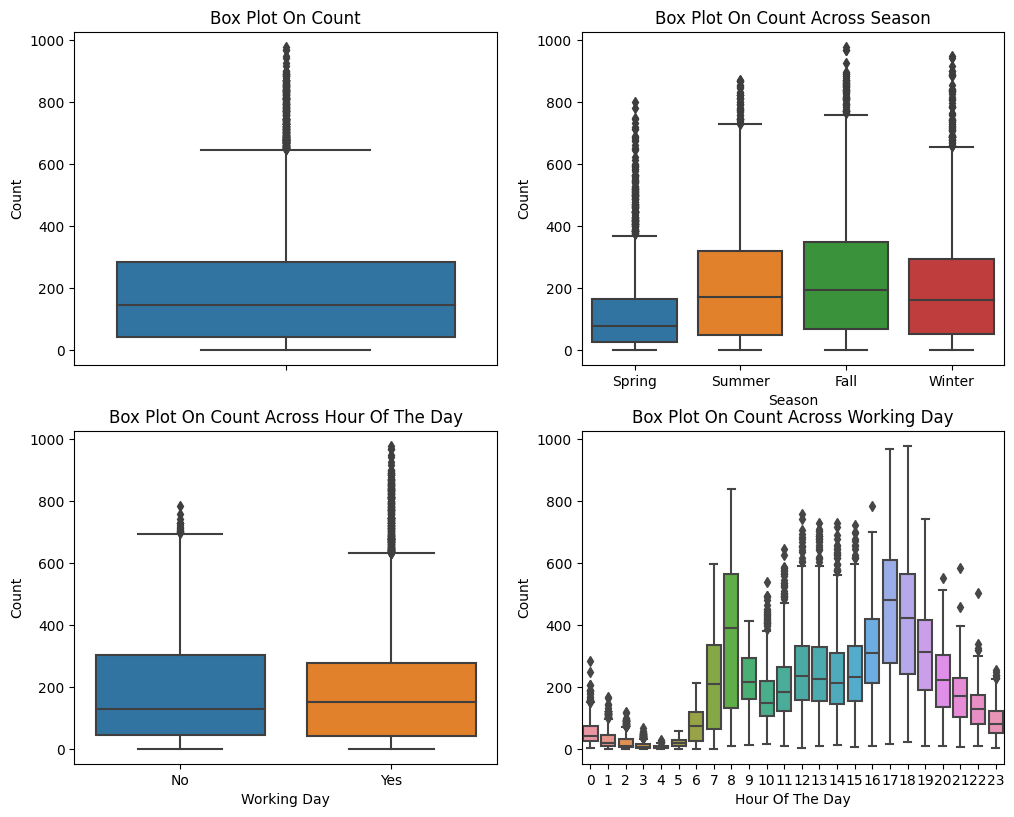

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2)
first_fig, second_fig, third_fig, fourth_fig = axes[0][0], axes[0][1], axes[1][0], axes[1][1]
fig.set_size_inches(12, 9.5)
sns.boxplot(data=train_df, y='count', orient='v', ax=first_fig)
sns.boxplot(data=train_df, y='count', x='season', orient='v', ax=second_fig)
sns.boxplot(data=train_df, y='count', x='workingday', ax=third_fig, orient='v')
sns.boxplot(data=train_df, y='count', x='hour', orient='v', ax=fourth_fig)

first_fig.set(ylabel='Count',title="Box Plot On Count")
second_fig.set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
second_fig.set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'])
third_fig.set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day", )
third_fig.set_xticklabels(['No', 'Yes'])
fourth_fig.set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Working Day")

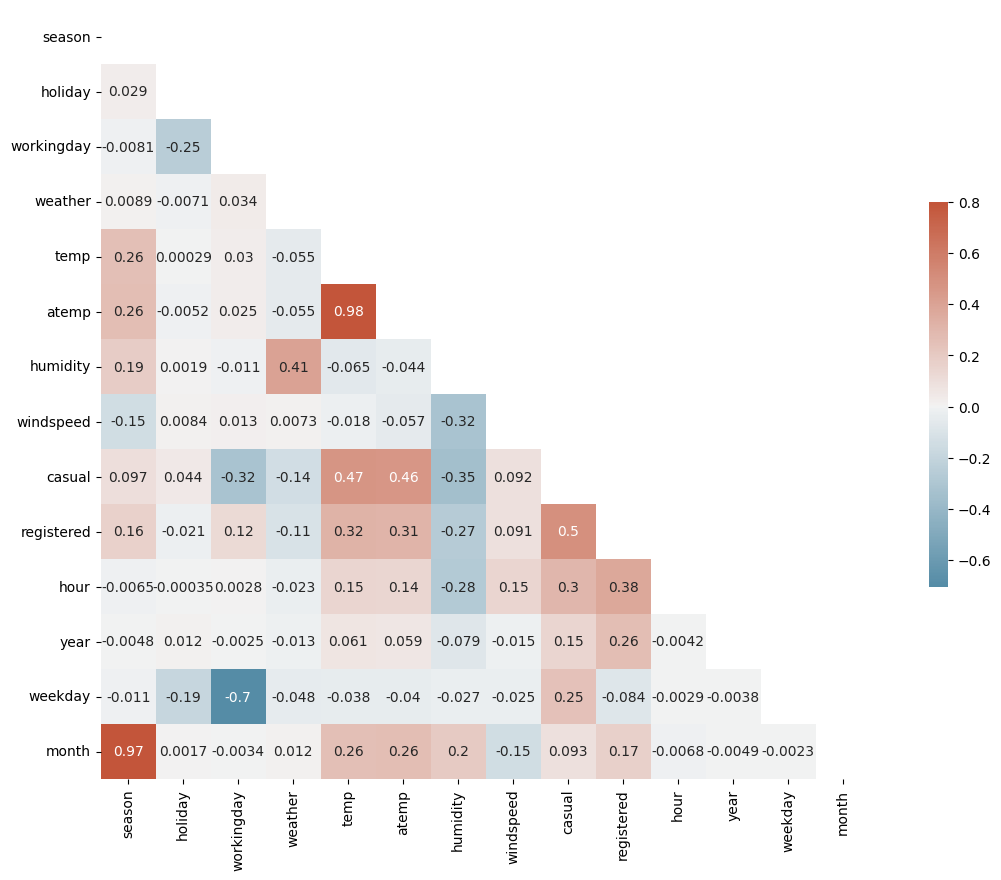

In [11]:
def correlation(df):
    corr_df = df.drop(columns=['count']).corr()
    mask = np.triu(np.ones_like(corr_df, dtype=bool))
    fig, ax = plt.subplots()
    fig.set_size_inches(15,10)
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr_df, mask=mask, cmap=cmap, center=0, vmax=0.8, square=True, annot=True, cbar_kws={'shrink': 0.5})
correlation(train_df)

#### Train and Evaluate Model

In [ ]:
def pipeline(model, x_train, y_train, x_val, y_val = None):
    y_train_log = np.log1p(y_train)

    model.fit(x_train,y_train_log)
    y_pred = model.predict(x_val)
    y_pred=np.exp(y_pred)
    rmsle= None
    if y_val is not None:
        y_val_log=np.log1p(y_val)
        msle=mean_squared_log_error(y_pred,np.exp(y_val_log))
        rmsle=np.sqrt(msle)
    return y_pred, rmsle